# t-Tests in Python!

## Introduction

*t-tests* are a family of statistical tests that can be used to determine if the means of two sets of data are statistically different from one another. Some of the most common t-tests are the *one-sample t-test*, the *independent, two-sample t-test*, and the *dependent t-test for paired samples*. A t-test determines the probability that the difference between two means could have been observed by random chance, given the shapes of the underlying distributions:
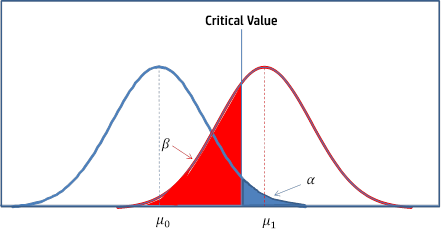

## One-Sample t-Tests

A one-sample t-test is used to evaluate the null hypothesis that the *population* mean is statistically equal to a specified value, given a set of *sample* measurements. For example, imagine that your friend told you that she thinks the average (mean) annual salary of a data scientist in the United States is \$125,000, and you want to know if this true. To test this hypothesis, you ask 30 randomly chosen data scientists to tell you their annual salaries. Your data show that the average salary of the data scientists in the sample is \$128,000, with a standard deviation of \$10,000. Based on your sample, can you reject the null hypothesis? Let's find the answer using Python...

In [2]:
#import the stats library from scipy -- we'll use this library to conduct our t-tests
from scipy import stats

#import the numpy library -- we'll use this to generate a simulated salary dataset
import numpy as np

#import the pandas library -- we'll use this library to view descriptive statistics for our data sets
import pandas as pd

#since we don't have a real data set, we'll use numpy to simulate a sample of 
#30 normally distributed observations whose mean is 128,000 with a standard deviation of 10,000.
np.random.seed(333)
sample = np.random.normal(128000, 10000, 30)

#load our sample data into a pandas dataframe
df = pd.DataFrame(sample)

#show descriptive statistics for the sample data
df.describe()

0
0   145171.842925
1   131246.933317
2   123254.565990
3   126620.816974
4   133249.395682
5   124421.641674
6   120717.950825
7   121579.135451
8   124829.523431
9   115809.985709
10  127480.196578
11  134940.273099
12  126764.022436
13  145736.170920
14  130726.925354
15  125870.417859
16  123267.875610
17  124864.989212
18  144216.738838
19  135179.492678
20  106781.870844
21  125574.155691
22  119731.887806
23  115225.430074
24  131180.625296
25  130671.719691
26  146255.946884
27  129524.720620
28  133205.848195
29  116783.833897

#### Two-Tailed t-Test

Since we simply want to know whether or not the average annual salary of a data scientist in the United States is statistically equal to \$125,000, we will conduct a two-tailed test. Put another way, we only want to know if the average data scientist's salary is *equal to* or *different from* \$125,000 -- we are not hypothesizing that the the average salary is *greater than* or *less than* \$125,000. Let's run the two-tailed, one-sample test:

In [3]:
#run a two-tailed, one sample t-test that evaluates whether the average salary for a
#data scientist is statistically equal to $125,000.
t,p = stats.ttest_1samp(sample, 125000)

#show the t- and p-values
print ("t-value: " + str(t))
print("p-value: " + str(p))

t-value: 1.7731100918810558
p-value: 0.08671489774637196


As you can see, the p-value of 0.087 for our non-directional t-test is larger than the typical threshold of 0.05 that is required for statistical significance. Thus, we cannot reject the null hypothesis, and we must conclude that there is no statistically significant difference between the mean of the salary data in our sample and the hypothesized mean of $125,000.

#### One-Tailed t-Test

What if instead of a non-directional (two-tailed) hypothesis, we had a good reason to believe that the average salary of data scientists in the United States was *greater than* \$125,000? In this case, we would have a one-tailed, *directional* hypothesis, since we would be hypothesizing the *direction* of the difference between the mean of our sample and the hypothesized mean. With a directional hypothesis, the p-value is divided by two because we are only considering the probability in one tail of the distribution. We can easily compute the one-tailed probability in Python:

In [4]:
#compute the one-tailed probability
pOneTailed = p / 2

#show the one-tailed p-value
print("One-tailed p-value: " + str(pOneTailed))

One-tailed p-value: 0.04335744887318598


The one-tailed p-value of 0.043 allows us to reject the null hypothesis, and conclude that the true average salary for data scientists in the United States is *greater than* \$125,000.

## Independent, Two-Sample t-Tests

Data scientists often need to assess whether there is a statistically significant difference between two groups. For example, let's imagine that we want to test the effectiveness of our company's new television advertisement. Our null hypothesis is that people who have seen the advertisement will purchase the same amount of Product X as people who have not seen the advertisement. Our alternative hypothesis is that people who have seen the advertisement will purchase *more* of Product X than people who have not seen the advertisement (note that this is a directional, one-tailed hypothesis). To test this hypothesis, we can use an independent, two-sample t-test:

In [5]:
np.random.seed(333)

#simulate a sample containing purchases of Product X for 100 people who have not seen our company's new advertisement.
didNotSeeAd = np.random.normal(33, 8, 100)

#simulate a sample containing purchases of Product X for 100 people who HAVE seen our company's new advertisement.
sawAd = np.random.normal(34.4, 8, 100)

#perform the independent, two-sample t-test
t,p = stats.ttest_ind(sawAd, didNotSeeAd)

#divide the resulting p-value by two (since this is a one-tailed test)
pOneTailed = p / 2

#show the results
print ("mean (did not see advertisement): " + str(didNotSeeAd.mean()))
print ("mean (did see advertisement): " + str(sawAd.mean()))
print ("t-value: " + str(t))
print("p-value: " + str(pOneTailed))

mean (did not see advertisement): 32.83220584681268
mean (did see advertisement): 35.05450098724242
t-value: 1.9105667489998148
p-value: 0.02875254799748071


The results indicate that people who saw our company's new television advertisement subsequently purchased more of Product X than people who did not see the advertisement. Whether this increased spending is enough to justify all of the costs associated with producing and airing the advertisement is a very different question!

## Dependent t-Test for Paired Samples

Another very common task in data science is to determine whether something has changed in our sample from one measurement to the next -- these are often called *repeated measures* or *before and after* tests. For example, imagine that a particular class has a midterm exam and a final exam. Among the 25 students in the class, the average score on the midterm exam was an 83% with a standard deviation of 3%. The professor is dissatisfied with her students' scores, and encourages them to spend more time studying. On the final exam, the average score was an 87% with a standard deviation of 4%. The professor wants to know if the class performed statistically better on the final exam. Since we have paired measurements (i.e., a midterm exam score and a final exam score for each student) we can use a dependent t-test for paired samples to find out...

In [6]:
np.random.seed(33333)

#simulate a sample containing midterm exam scores for 25 students (mean = 83, stdev = 3).
midtermScores = np.random.normal(83, 3, 25)

#simulate a sample containing final exam scores for 25 students (mean = 87, stdev = 5).
finalScores = np.random.normal(87, 5, 25)

#perform the paired (related) t-test
t,p = stats.ttest_rel(finalScores, midtermScores)

#divide the resulting p-value by two (since this is a one-tailed test)
pOneTailed = p / 2

#show the results
print ("mean (midterm exam): " + str(midtermScores.mean()))
print ("mean (final exam): " + str(finalScores.mean()))
print ("t-value: " + str(t))
print("p-value: " + str(pOneTailed))

mean (midterm exam): 83.35166689205295
mean (final exam): 86.58412436765997
t-value: 2.180544604115921
p-value: 0.019625803910839443


The results of the t-test suggest that the average score on the final exam was indeed statistically greater than the average score on the midterm exam.